<div style="text-align: right"><strong>Capstone #2:</strong> <span style="color:darkred">Unit 1 Narrative Analytics and Experimentation </span> </div>

<a id="top"></a>

 ---------

# <span style="color:darkblue">Heart Disease Sample Bias</span>

__Author:__ Ryan Harper 

----

<a href='#ov'>A. Overview</a><br>
<a href='#exp'>B. Experiment</a><br>
<a href='#sec1'>1. Cleaning Data</a><br>
<a href='#sec2'>2. Exploring</a><br>
<a href='#sec3'>3. Feature Analysis</a><br>
<a href='#sec4'>4. Principle Components Analysis</a><br>
<a href='#sec5'>5. Bivariate Statistical Significance</a><br>


-----

<br>The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

<ol>
<li>Analysis that highlights your experimental hypothesis.
<li>A rollout plan showing how you would implement and rollout the experiment
<li>An evaluation plan showing what constitutes success in this experiment

<div style="text-align: center"> <strong>Heart Disease Classification (1-4)</strong> </div>

<img src=http://www.heartfailure.org/wp-content/uploads/2015/03/www.HF-Stages1.jpg width="600">

<div style="text-align: right">http://www.heartfailure.org/heart-failure/the-stages-of-heart-failure/index.html </div>

<a id="ov"></a>

# <span style="color:darkblue">Overview</span>  <a href='#top'>(top)</a>

__Data Source:__ http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

This data on health and heart disease was made available by UC Irvine's Machine Learning Repository (http://archive.ics.uci.edu/ml/index.php). It includes categorical variables (i.e. ~2-4 variations of a physical attribute) and continuous variables (blood pressure, cholesterol, and age). The question proposed by the research team was whether the first 13 features (from __age__ to __thal__) can predict the type of heart disease (__num__).

__Variables:__
>__age:__ _age in years_<br>
__sex:__ _sex (1 = male; 0 = female)_ <br>
__cp:__ _chest pain type (1=typical) (1-4)_<br>
__trestbps:__ resting blood pressure (in mm Hg)<br>
__chol:__ serum cholesterol (in mg/dl)<br>
__fbs:__ fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)<br>
__restecg:__ resting electrocardiographic results (0 = normal) (0-2)<br>
__thalach:__ maximum heart rate achieved<br>
__exang:__ exercise induced angina (1 = yes; 0 = no)<br>
__oldpeak:__ st depression induced by exercise relative to rest<br>
__slope:__ the slope of the peak exercise ST segment (1: upslope, 2: flat, 3: downslope)<br>
__ca:__ number of major vessels (0-3)<br>
__thal:__ 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
__num:__ diagnosis of heart disease (angiographic disease status) (0: no presence, 1-4: increasing classification of heart disease severity)<br>

<a id="exp"></a>

# <span style="color:darkblue">Experiment</span> <a href='#top'>(top)</a>

__Hypothesis:__ 
> Different hospital locations (Switzerland, VA, Hungarian, Cleveland) had different processes for collecting data. Samples by these locations can be determined using a categorical data science model.

__Thoughts and Observations:__
> In order to be able to use this data to diagnose heart disease it's import to assess whether the data samples include any significant biases. This heart disease research project was conducted in four different locations in both the US and in Europe. Because of the diversity in where data was collected, it is important to first review the samples by location to make sure that there are not any significant missing variables by location that could negatively affect the data.<br><br>An exploratory analysis of the data showed that some of the __locations__ had a lot of missing data. For example, Switzerland had a high percentage of null data in certain categories. This indicates that the data collection method for different hospital locations may not have been identical. <br><br>Sample locations had some notable difference in variable means and variance. __Age__ and __Thalach__ trends were notably different between sample locations.<br><br>Ultimately there do appear to be some difference between locations. My hypothesis is assumes that samples vary dramatically between location. Inability to confirm this hypothesis would mean that different sample locations will not significantly influence assessment of heart disease.

__Method:__
> __Answer 1:__ Sample sizes vary significantly between genres (may reflect the overall industry or just a result of scraped data). There are significant differences between genres with regards to average gross profits but this might also be impacted by average budget. Animation films appear to have the best gross profit between the inner and upper quartile range. Romance, Horror, and Music genres seem to trend towards a positive gross profit albeit their upper quartile ranges are smaller than other high grossing genres. The lower quartile range of Action and Adventure genres seem to show a larger range of financial loss. <br><br>
__Answer 2:__ Based on the histogram plots, most genres appear to be left skewed. Exponential curves in QQ plots indicates most genres are left skewed. Animation appears more linear so it could have a normal distribution.<br><br>
__Answer 3:__ Action, Fantasy, Science Fiction genres have the highest correlation between budget and profit. Western, Horror, War, and History genres have low correlation between budget and profit

----------

<a id="sec1"></a>

# <span style="color:darkblue">Part 1: Cleaning Data</span> <a href='#top'>(top)</a>

In [44]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
from matplotlib.pyplot import subplots, show
import ast
import math
import re
from scipy.stats import ttest_ind, mannwhitneyu, median_test, f_oneway
import missingno as msno
from IPython.display import display
from IPython.core.debugger import Tracer

%matplotlib inline

In [2]:
# change optional settings for libraries
sns.set_style("whitegrid")
pd.set_option('show_dimensions', False)
np.warnings.filterwarnings('ignore')

In [3]:
filename = ['processed.cleveland.data','processed.hungarian.data','processed.switzerland.data','processed.va.data']
colnames=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [4]:
heartdisease = []

for path in filename:
    tempdf = pd.read_csv('../data/' + path, names=colnames)
    tempname = re.findall(r'\.([a-z]*)\.',path)[0]
    # adds location of data to the dataframe
    tempdf['location'] = tempname
    heartdisease.append(tempdf)

heartdf = pd.concat(heartdisease)

In [5]:
heartdf['location'].loc[heartdf['num'] == 0].value_counts()

heartdf['location'] = pd.Categorical(heartdf['location'])

__Missing Data__

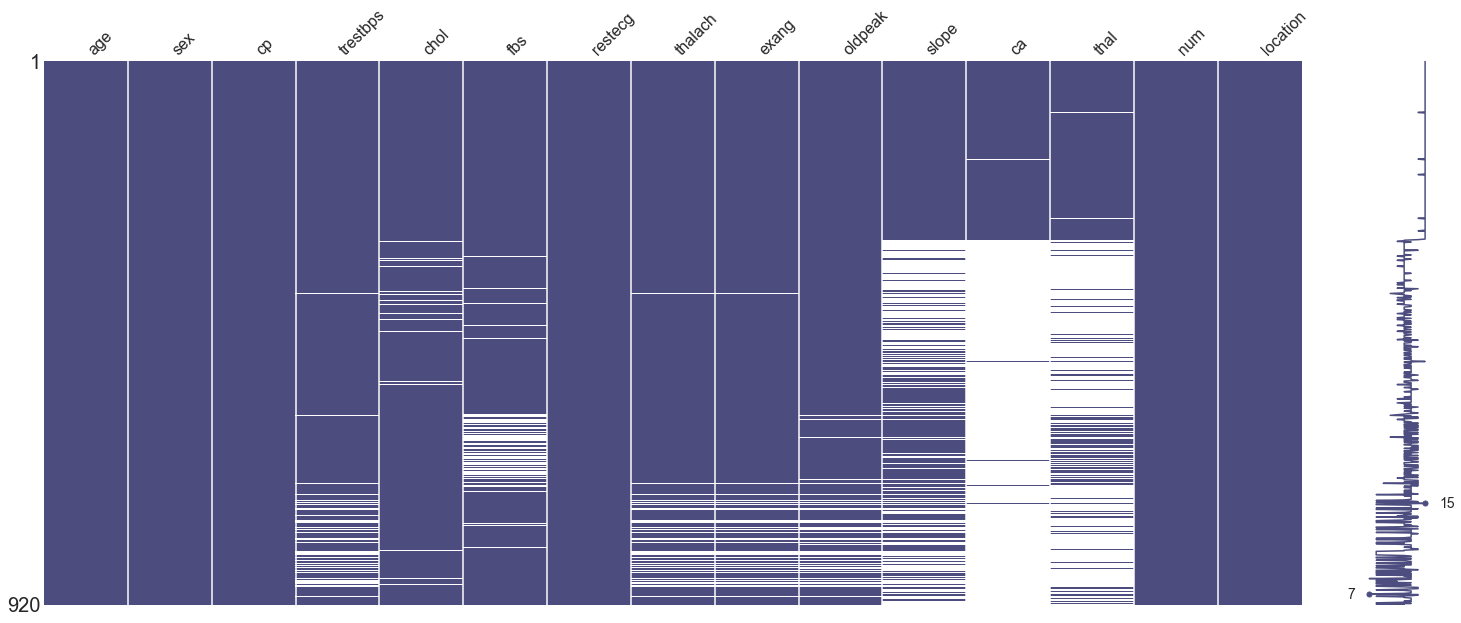

In [6]:
# check for missing data
heartdf = heartdf.replace('?',np.nan)

msno.matrix(heartdf,color=(.3, .3, .5))

_ __slope__, __ca__, and __thal__ appear to have a large number of missing values. __trestbps__, __thalach__, __exang__, and __oldpeak__ appear to have a smaller percentage of missing values for the entire row._

__Delete variables with large number of null values__

In [7]:
del heartdf['slope']
del heartdf['ca']
del heartdf['thal']

__Clean null value rows from dataframe and convert strings to floats__

In [8]:
print("Location Count Before DropNA:\n{}".format(heartdf['location'].value_counts()))

heart = heartdf.loc[heartdf['chol'] != 0].dropna()

for column in heart.columns:
    if column != 'location':
        heart[column] = pd.to_numeric(heart[column])
        
print("\nLocation Count After DropNA:\n{}".format(heart['location'].value_counts()))

Location Count Before DropNA:
cleveland      303
hungarian      294
va             200
switzerland    123
Name: location, dtype: int64

Location Count After DropNA:
cleveland      303
hungarian      261
va             130
switzerland      0
Name: location, dtype: int64


__Check again for Missing Data__

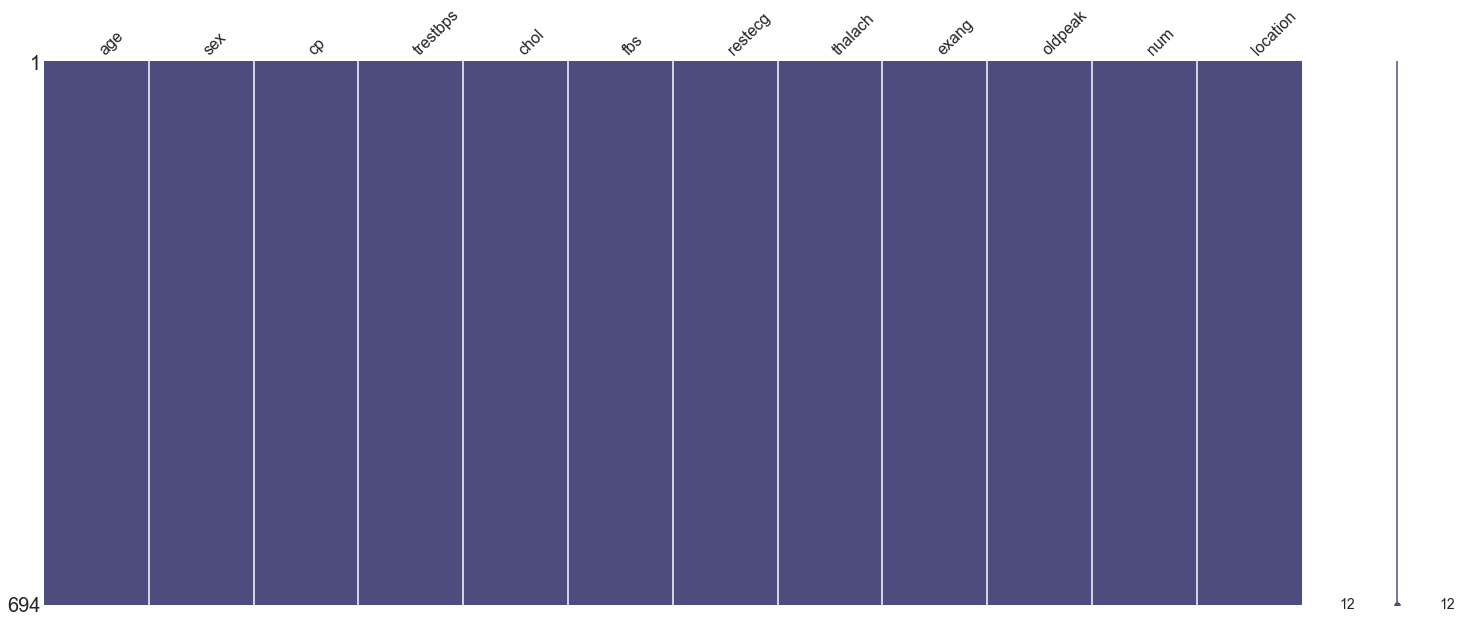

In [9]:
msno.matrix(heart,color=(.3, .3, .5))

_180 rows were lost from data cleaning, 3 variables were removed, and string object columns were converted to floats._

__Data Summary:__

In [10]:
# reporting of data
display(heart.head(3),heart.shape,heart.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 199
Data columns (total 12 columns):
age         694 non-null float64
sex         694 non-null float64
cp          694 non-null float64
trestbps    694 non-null float64
chol        694 non-null float64
fbs         694 non-null float64
restecg     694 non-null float64
thalach     694 non-null float64
exang       694 non-null float64
oldpeak     694 non-null float64
num         694 non-null int64
location    694 non-null category
dtypes: category(1), float64(10), int64(1)
memory usage: 65.9 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,location
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1,cleveland


(694, 12)

None

<a id="sec2"></a>

#  <span style="color:darkblue">Part 2: Exploring the data</span> <a href='#top'>(top)</a>

__A. Scatterplot using univariate and bivariate methods__

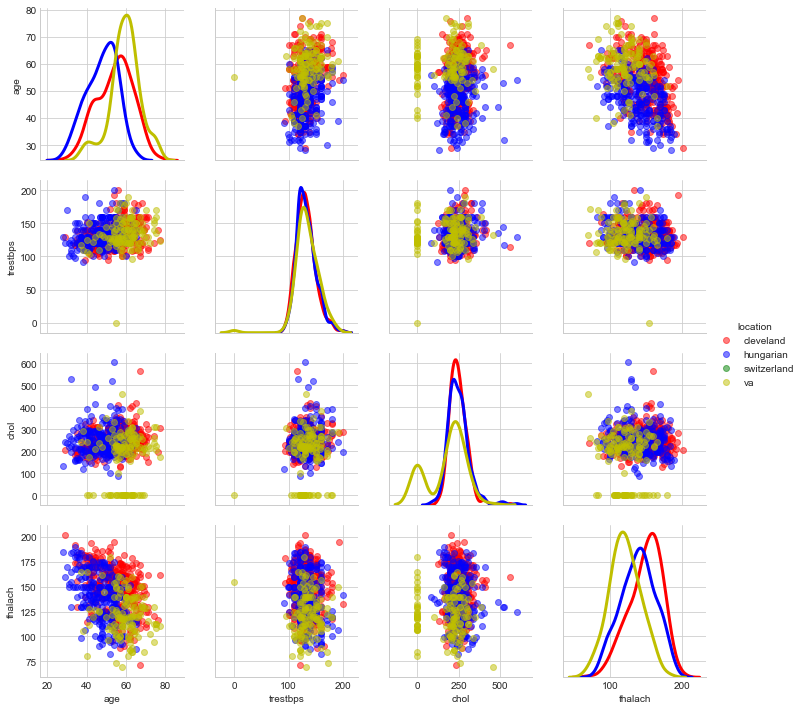

In [11]:
# Make the scatterplot matrix
collist = ['age','trestbps','chol','thalach']


g = sns.PairGrid(data=heart, diag_sharey=False, hue="location", vars=collist, palette=['r','b','g','y'])
g.map_offdiag(plt.scatter, alpha=.5)
g.map_diag(sns.kdeplot, lw=3)

g.add_legend()

plt.show()

<a id="sec3"></a>

#  <span style="color:darkblue">Part 3: Statistical Significance <a href='#top'>(top)</a>

__A. T-test (Parametric A/B Independent Samples)__

In [32]:
#Ex T-Test with scipy for parametric, (equal_var=True because same population)
t, p = ttest_ind(heart['chol'].loc[heart['location'] == 'hungarian'], heart['chol'].loc[heart['location'] == 'cleveland'], equal_var=False)
print('tvalue: {}, pvalue:{}'.format(t,p))

tvalue: 0.423019519286326, pvalue:0.6724659887837807


In [38]:
heart['chol'].loc[heart['location'] == 'cleveland'].std()

51.776917542637015

_P-value is less than 5%. Indicates variation between the Animation and Action. T-value is 4.878 (a little low)_

In [42]:
# T-Test Raw Calculation for parametric data (assuming different population?)

# Compute the difference between the two sample means.
diff=heart['chol'].loc[heart['location'] == 'hungarian'].mean() - heart['chol'].loc[heart['location'] == 'cleveland'].mean()
print('Difference of Means: {}'.format(diff))

# size of samples
size = np.array([heart['chol'].loc[heart['location'] == 'hungarian'].count(), heart['chol'].loc[heart['location'] == 'cleveland'].count()])
print('Size: {}'.format(size))

# sample distribution
sd = np.array([heart['chol'].loc[heart['location'] == 'hungarian'].std(), heart['chol'].loc[heart['location'] == 'cleveland'].std()])
print('Standard Deviation: {}'.format(sd))

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5

print("T-Value: {}".format(diff/diff_se))

Difference of Means: 2.130685482341363
Size: [261 303]
Standard Deviation: [65.66798461 51.77691754]
T-Value: 0.42301951928632614


_T-value is 4.45 and is close to scipy ttest results._

__B. Mood’s Median test (2+ Non-Normally Distributed Independent Samples)__

In [47]:
stat, p, med, tbl = median_test(heart['chol'].loc[heart['location'] == 'hungarian'],heart['chol'].loc[heart['location'] == 'va'],heart['chol'].loc[heart['location'] == 'cleveland'])
print(stat,med)
print(p)

17.416297183196992 236.0
0.00016523388686714332


__C. One-Way AnovaTest (2+ Normally Distributed Independent Samples)__

In [46]:
f, p = f_oneway(heart['chol'].loc[heart['location'] == 'hungarian'],heart['chol'].loc[heart['location'] == 'va'],heart['chol'].loc[heart['location'] == 'cleveland'])

print("F-Value: {}, p:{}".format(f,p))

F-Value: 48.61552114242679, p:1.7614456664772223e-20


# <span style="color:darkblue">Final Thoughts</span>

------------------

__NOTES__

Samples Comparison Test Chart: https://courses.thinkful.com/data-201v1/assignment/5.5.1

------

# <span style="color:darkblue">Extra</span>

<a id="sec4"></a>

##  <span style="color:darkblue">Part 4: Feature Engineering <a href='#top'>(top)</a>

In [12]:
heart.head
heart.location.unique()

[cleveland, hungarian, va]
Categories (3, object): [cleveland, hungarian, va]

In [13]:
def dum_feat():
    # Making dummies.
    # Also creating a data frame to hold our features.
    features = pd.get_dummies(heart['num'])
    features['num'] = heart['num']
    features = features.drop(features.columns[0:5], axis=1)
    features['age'] = heart['age']
    features['exists'] = np.where(heart['num'] >= 1, 1, 0)
    features['gender'] = heart['sex']
    features['adult'] = np.where(heart['sex'] >= 18, 1, 0)

    features['chol'] = heart['chol']
    features['cholwarn'] = np.where(heart['chol'] >= 240, 1, 0)
    features['bp'] = heart['trestbps']
    features['bpwarn'] = np.where(heart['chol'] >= 140, 1, 0)
    loc = ['cleveland','va','hungarian']
    features['location'] = pd.Categorical(heart.location).codes
    return features

features = dum_feat()

In [14]:
features.head()

,num,age,exists,gender,adult,chol,cholwarn,bp,bpwarn,location
0,0,63.0,0,1.0,0,233.0,0,145.0,1,0
1,2,67.0,1,1.0,0,286.0,1,160.0,1,0
2,1,67.0,1,1.0,0,229.0,0,120.0,1,0
3,0,37.0,0,1.0,0,250.0,1,130.0,1,0
4,0,41.0,0,0.0,0,204.0,0,130.0,1,0


In [15]:
features.bp.min()

0.0

<a id="sec5"></a>

##  <span style="color:darkblue">Part 5: Principal Components Analysis <a href='#top'>(top)</a>

In [16]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

Actual Transformation

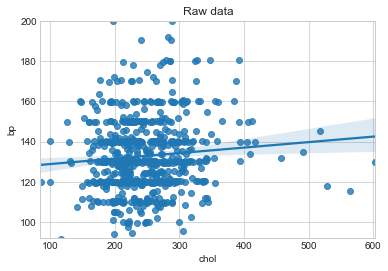

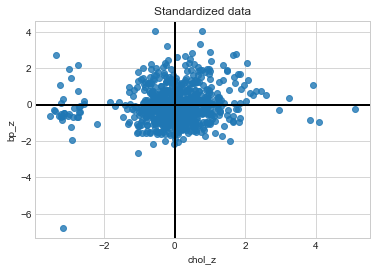

In [17]:
t = sns.regplot(
    'chol',
    'bp',
    features,
    x_jitter=.49,
    y_jitter=.49,
)
t.set(xlim=(85, 603), ylim=(92, 200))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardizing variables by subtracting the mean and dividing by the standard
# deviation. Now both variables are on the same scale.
features['chol_z'] = (features['chol'] - features['chol'].mean()) / features['chol'].std()
features['bp_z']  = (features['bp'] - features['bp'].mean()) / features['bp'].std()

t = sns.regplot(
    'chol_z',
    'bp_z',
    features,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

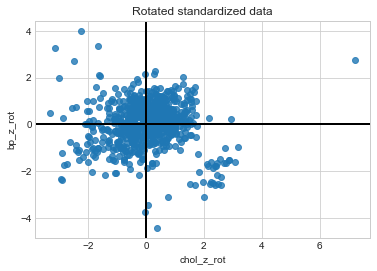

In [18]:
# Rotating the data so that the axes roughly match to vector above.
features['chol_z_rot'] = math.cos(40) * features['chol_z'] - math.sin(40) * features['bp_z']
features['bp_z_rot'] = math.sin(40) * features['chol_z'] + math.cos(40) * features['bp_z']

t = sns.regplot(
    'chol_z_rot',
    'bp_z_rot',
    features,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

In [19]:
# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them.
features = dum_feat()

featuresco = features.drop(['num','exists','adult','cholwarn','bpwarn'], axis=1)
features.head()

,num,age,exists,gender,adult,chol,cholwarn,bp,bpwarn,location
0,0,63.0,0,1.0,0,233.0,0,145.0,1,0
1,2,67.0,1,1.0,0,286.0,1,160.0,1,0
2,1,67.0,1,1.0,0,229.0,0,120.0,1,0
3,0,37.0,0,1.0,0,250.0,1,130.0,1,0
4,0,41.0,0,0.0,0,204.0,0,130.0,1,0


In [20]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(featuresco)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.001443    0.02564132 -0.01179108  0.24261812  0.17224614]
 [ 0.02564132  1.001443   -0.14986443  0.02024546  0.2353328 ]
 [-0.01179108 -0.14986443  1.001443    0.11362431 -0.3148957 ]
 [ 0.24261812  0.02024546  0.11362431  1.001443    0.05258436]
 [ 0.17224614  0.2353328  -0.3148957   0.05258436  1.001443  ]]


In [21]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.30596591]
 [-0.46516568]
 [ 0.51268266]
 [-0.11555577]
 [-0.64327996]]
Eigenvalue 1: 1.513954197043677
----------------------------------------
Eigenvector 2: 
[[-0.59845342]
 [ 0.12215076]
 [-0.37302844]
 [-0.69798784]
 [ 0.02440199]]
Eigenvalue 2: 1.2648065870015992
----------------------------------------
Eigenvector 3: 
[[ 0.32871276]
 [-0.81518615]
 [-0.40691166]
 [-0.20195828]
 [ 0.14510418]]
Eigenvalue 3: 0.8794227193599562
----------------------------------------
Eigenvector 4: 
[[ 0.24023157]
 [ 0.22048773]
 [-0.56884519]
 [ 0.11051002]
 [-0.7469114 ]]
Eigenvalue 4: 0.628969158198809
----------------------------------------
Eigenvector 5: 
[[-0.6184457 ]
 [-0.23570488]
 [-0.32991562]
 [ 0.66817679]
 [ 0.08163075]]
Eigenvalue 5: 0.720062345610971
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.30235454 0.25259682 0.17563111 0.12561257 0.14380496]


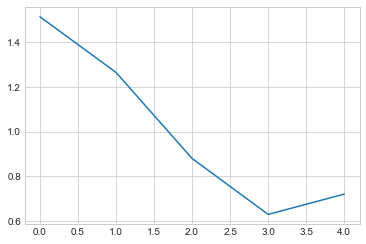

In [22]:
plt.plot(eig_val_cov)
plt.show()

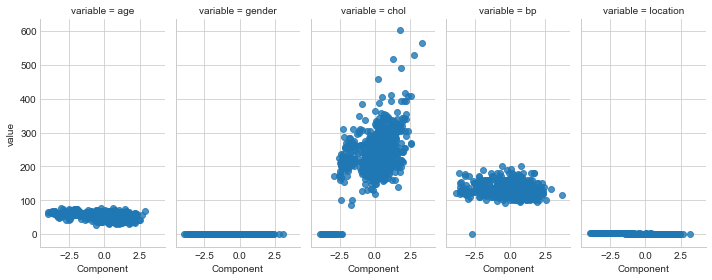

In [23]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = features[['age','gender','chol','bp','location']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

categorical variables?

In [24]:
sklearn_pca = PCA(n_components=5)
X = StandardScaler().fit_transform(featuresco)
Y_sklearn = sklearn_pca.fit_transform(X)

print(X)
print('')
print(Y_sklearn)

[[ 1.07686006  0.57180403 -0.02247899  0.6744036  -0.86279067]
 [ 1.50166658  0.57180403  0.66711432  1.48677821 -0.86279067]
 [ 1.50166658  0.57180403 -0.07452377 -0.6795541  -0.86279067]
 ...
 [ 0.12104538 -1.74885092  1.27864047 -0.30044594  1.89654907]
 [ 0.22724701  0.57180403 -0.15259094 -0.57123748  1.89654907]
 [ 0.97065842  0.57180403  0.25075609 -0.6795541   1.89654907]]

[[ 1.29905948e-01 -1.05799830e+00 -3.64398043e-01  4.13149721e-01
  -1.11651516e+00]
 [ 2.14296287e-04 -2.13649074e+00 -6.69428063e-01  3.60567235e-01
  -9.16070787e-01]
 [ 1.30107098e-01 -3.47765022e-01  6.98618791e-02  1.56338221e+00
  -1.09854662e+00]
 ...
 [-2.46712721e-01 -5.07045557e-01  1.28100923e+00  1.30425047e-01
   2.53362614e+00]
 [ 1.56774640e+00  4.35766698e-01  6.12266334e-02  4.51845713e-01
   1.21221328e+00]
 [ 1.57589931e+00 -8.39866388e-02  1.63344277e-01  1.11705045e+00
   1.27503449e+00]]


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.30235454 0.25259682 0.17563111 0.14380496 0.12561257]


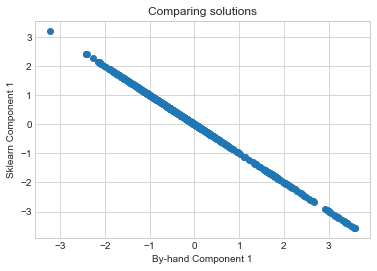

In [25]:
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [ ]:
heartdf['sex'] = heartdf['sex'].apply(lambda value: 'male' if value == 1 else 'female')

In [ ]:
fig,ax = plt.subplots()

plt.hist(heartdf['age'])
plt.show()

data has a normal distribution

In [ ]:
norm = np.random.normal(0,1,heartdf['age'].count())
norm.sort()
normcheck = np.array(heartdf['age'].astype(int).sort_values())
plt.plot(norm,normcheck,"o")
plt.show()

data has a normal distribution

In [ ]:
plt.boxplot(heartdf['age'])
plt.show()

quartile ranges are between ~27 and ~75. Median is around 55.

In [ ]:
fig,ax = plt.subplots()

for i in range(1,5):
    ax.bar(i, heartdf['sex'][(heartdf['sex'] == 'female') & (heartdf['num']==i)].count(), width=0.4, color='r')
    ax.bar(i+(.4), heartdf['sex'][(heartdf['sex'] == 'male') & (heartdf['num']==i)].count(), width=0.4, color='b')
plt.title('Bar Plot of Male/Female distribution per type of heart disease')
plt.legend(['Female','Male'])
plt.xticks([1.2,2.2,3.2,4.2], ['1','2','3','4'], rotation='horizontal')
plt.show()

Seems like the ratio of men to women per heart disease category is fairly even.

In [ ]:
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x='num', y='age', hue="sex", data=heartdf,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Barplot: Heart disease by avg(age) per gender')
plt.show()

As heart disease categories increase in severity, so does the average age for men and women

In [ ]:
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.factorplot(x="num", y="age", hue="sex", data=heartdf,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("Heart Disease Diagnosis")
plt.title('Pointplot: Age by Heart Disease Category and Gender')
plt.show()

Similar to the above bar plot except that it shows the ranges

In [ ]:
nheartdf = heartdf.loc[(heartdf['chol'] != '?')].copy()
nheartdf['chol'] = nheartdf['chol'].astype(int)

nheartdf = nheartdf.loc[nheartdf['chol'] != 0]

In [ ]:
g = sns.lmplot(y='chol', 
               x='age',
               data=nheartdf, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("cholesterol")
g.set_xlabels("age")
plt.title('Scatterplot with regression line: Cholesterol by Age')
plt.show()

In [ ]:
# Setting the overall aesthetic.
sns.set(style="white")


g = sns.lmplot(y='chol', 
               x='age',
               hue='sex',
               data=nheartdf, # Data.
               col='num',
               fit_reg=True, 
               ci=False,
               scatter_kws={'alpha':0.4}, 
               palette='pastel',
               lowess=True) # Using local weighing to fit a line.
g.set_ylabels("cholesterol")
g.set_xlabels("age")
plt.ylim(150,350)
plt.suptitle('Scatterplot Lowess: Meal Tips by Total Bill, split by time and gender')
plt.subplots_adjust(top=0.9)
plt.show()

The cholesterol levels seem more erratic at higher heart disease categories but sample size is also decreasing.